In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw_data = pd.read_excel('titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


데이터 확인, age만 값이 263개 부족하여 전처리 진행.

In [3]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('int')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float64
 1   survived   1045 non-null   int32  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float64
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   float64
 6   parch      1045 non-null   float64
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(7), int32(1), object(6)
memory usage: 118.4+ KB


In [4]:
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre.head()


,pclass,sex,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,0.0,0.9167,1.0,2.0,151.5500
2,1.0,1.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,1.0,25.0000,1.0,2.0,151.5500


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']], test_size=0.1, random_state=13)


In [6]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)


# Max Depth = 1

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=13)
tree_clf.fit(X_train, y_train)
print('Train Score: {}'.format(tree_clf.score(X_train, y_train)))
print('Test Score: {}'.format(tree_clf.score(X_test, y_test)))

Score: 0.7755319148936171
Score: 0.8095238095238095


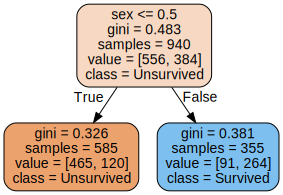

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot


# Max Depth = 2

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)
print('Train Score: {}'.format(tree_clf.score(X_train, y_train)))
print('Test Score: {}'.format(tree_clf.score(X_test, y_test)))

Train Score: 0.7882978723404256
Test Score: 0.8380952380952381


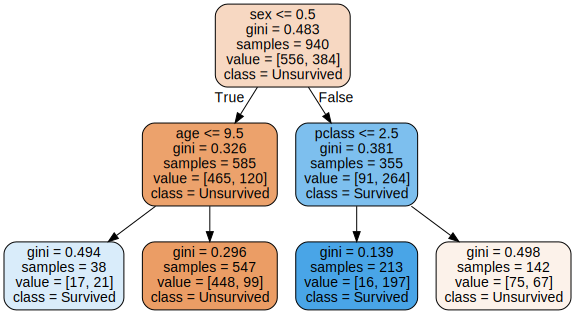

In [21]:
export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot


# Max Depth = 3

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)
print('Train Score: {}'.format(tree_clf.score(X_train, y_train)))
print('Test Score: {}'.format(tree_clf.score(X_test, y_test)))

Train Score: 0.8117021276595745
Test Score: 0.8476190476190476


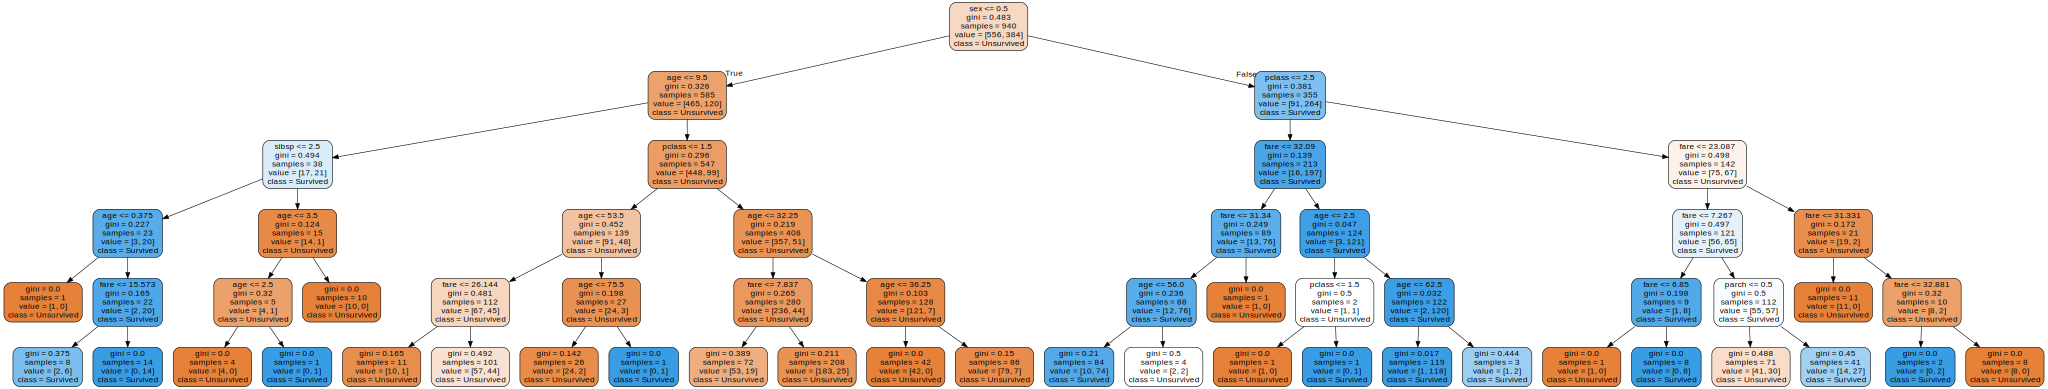

In [36]:
export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot


# Max Depth = 4

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
tree_clf.fit(X_train, y_train)
print('Train Score: {}'.format(tree_clf.score(X_train, y_train)))
print('Test Score: {}'.format(tree_clf.score(X_test, y_test)))

Train Score: 0.8138297872340425
Test Score: 0.8476190476190476


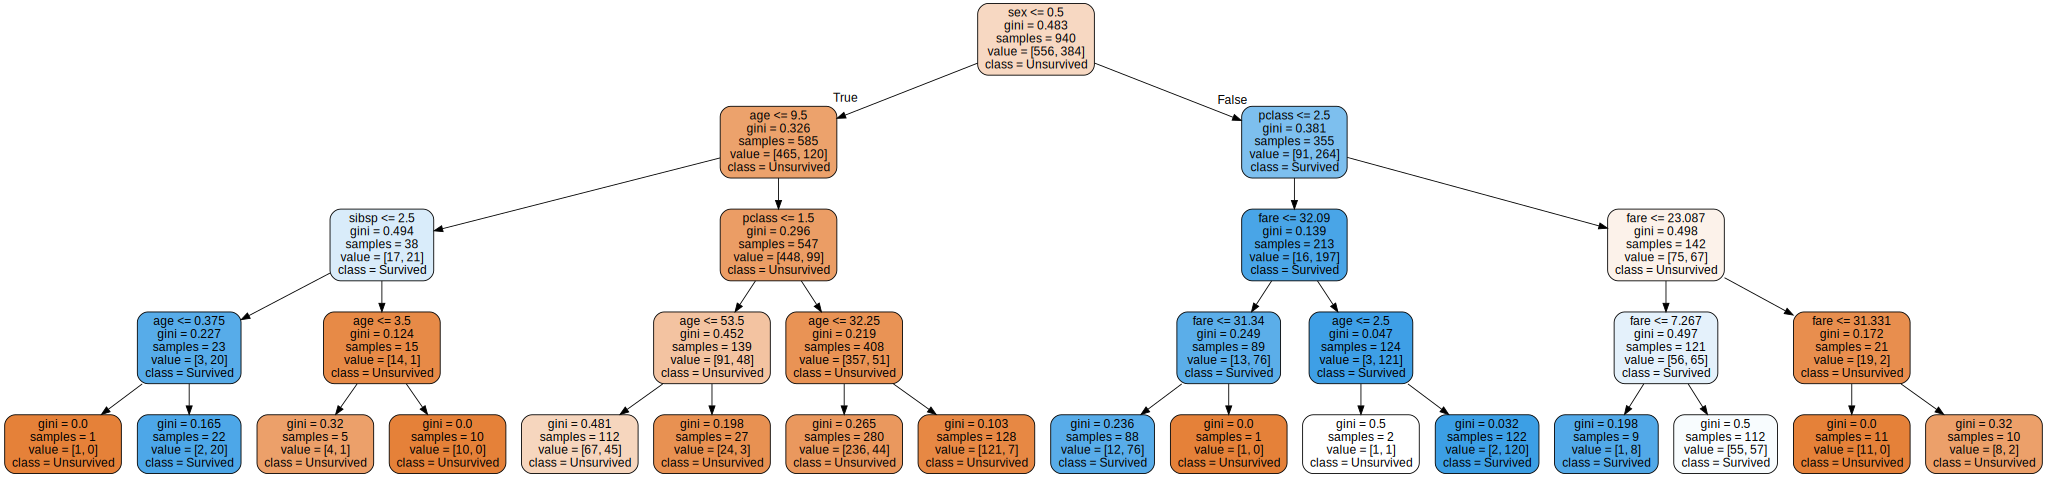

In [26]:
export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot


# Max Depth = 5

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=13)
tree_clf.fit(X_train, y_train)
print('Train Score: {}'.format(tree_clf.score(X_train, y_train)))
print('Test Score: {}'.format(tree_clf.score(X_test, y_test)))

Train Score: 0.8319148936170213
Test Score: 0.8285714285714286


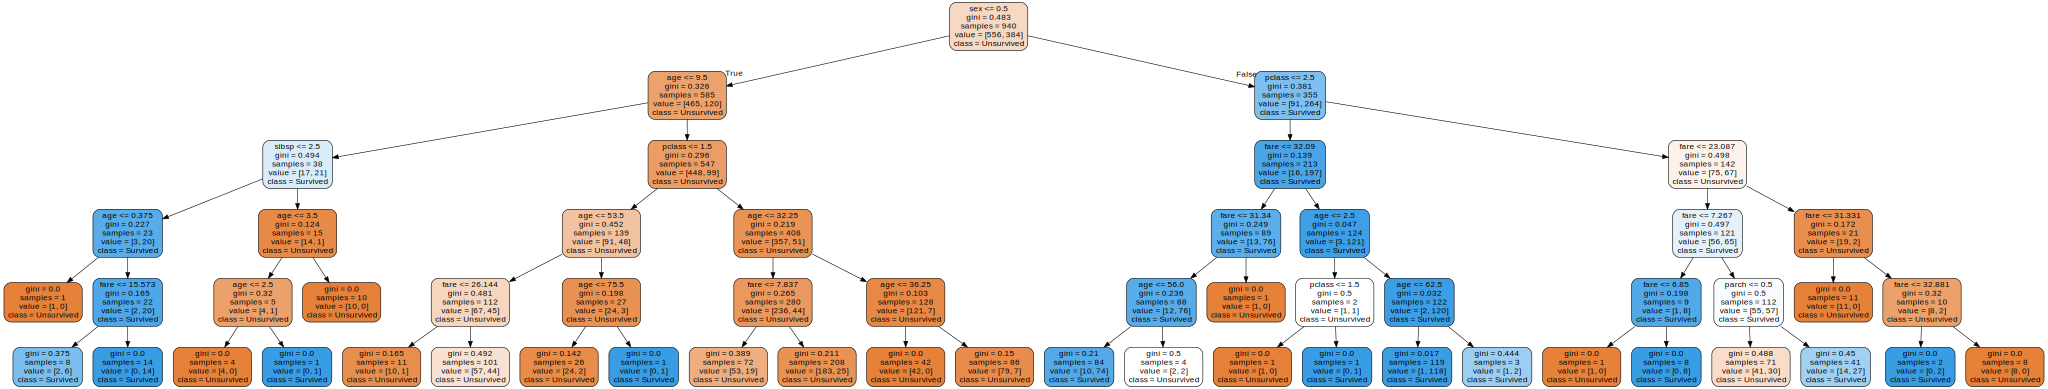

In [30]:
export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot
